In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from fcmpy import FcmSimulator, FcmIntervention

In [3]:
# Generate synthetic student healthcare data in Switzerland
np.random.seed(42)

num_students = 100

data = {
    'LanguageProficiency': np.random.randint(1, 6, num_students),
    'InsuranceUnderstanding': np.random.randint(1, 6, num_students),
    'PersonalEconomy': np.random.randint(1, 6, num_students),
    'HealthcareAccess': np.random.randint(1, 6, num_students)
}

df = pd.DataFrame(data)

In [4]:
# Define the FCM concepts
concepts = ['LanguageProficiency', 'InsuranceUnderstanding', 'PersonalEconomy', 'HealthcareAccess']

# Define the weight matrix (adjust as needed)
weight_matrix = pd.DataFrame(np.array([
    [0, 0.6, 0.4, 0.7],
    [0, 0, 0.3, 0.8],
    [0, 0, 0, 0.6],
    [0, 0, 0, 0]
]), columns=concepts, index=concepts)

# Example initial state (using the first student's data)
init_state = {
    'LanguageProficiency': df['LanguageProficiency'][0],
    'InsuranceUnderstanding': df['InsuranceUnderstanding'][0],
    'PersonalEconomy': df['PersonalEconomy'][0],
    'HealthcareAccess': df['HealthcareAccess'][0]
}

In [5]:
# FcmSimulator
sim = FcmSimulator()

# Run the simulation
res_sigmoid = sim.simulate(initial_state=init_state, weight_matrix=weight_matrix, transfer='sigmoid', inference='mKosko', thresh=0.001, iterations=50, l=1)
res_hyperbolic = sim.simulate(initial_state=init_state, weight_matrix=weight_matrix, transfer='tanh', inference='mKosko', thresh=0.001, iterations=50, l=1)


The values converged in the 5 state (e <= 0.001)
The values converged in the 4 state (e <= 0.001)


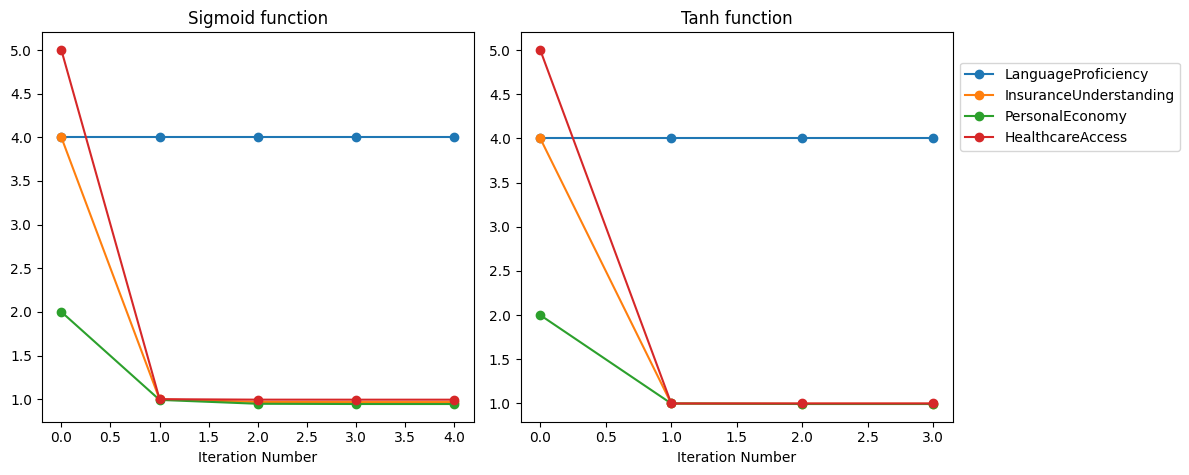

In [6]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

res_sigmoid.plot(ax=axes[0], marker='o')
axes[0].get_legend().remove()
axes[0].set_xlabel("Iteration Number")
axes[0].set_title("Sigmoid function")

res_hyperbolic.plot(ax=axes[1], marker='o')
axes[1].legend(bbox_to_anchor=(1, 0.94))
axes[1].set_xlabel("Iteration Number")
axes[1].set_title("Tanh function")

plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()

In [7]:
# FcmIntervention
inter = FcmIntervention(FcmSimulator)

inter.initialize(initial_state=init_state, weight_matrix=weight_matrix, transfer="tanh", inference="mKosko", thresh=0.001, iterations=50, l=1)

#Baseline
baseline = inter.test_results["baseline"][concepts]

# Add an intervention (e.g., improve language proficiency)
inter.add_intervention("Improve_Language", type="continuous", impact={"LanguageProficiency": 0.5}, effectiveness=1)
inter.test_intervention("Improve_Language", iterations=50)
intervention_results = inter.test_results["Improve_Language"][concepts]

The values converged in the 4 state (e <= 0.001)
The values converged in the 7 state (e <= 0.001)


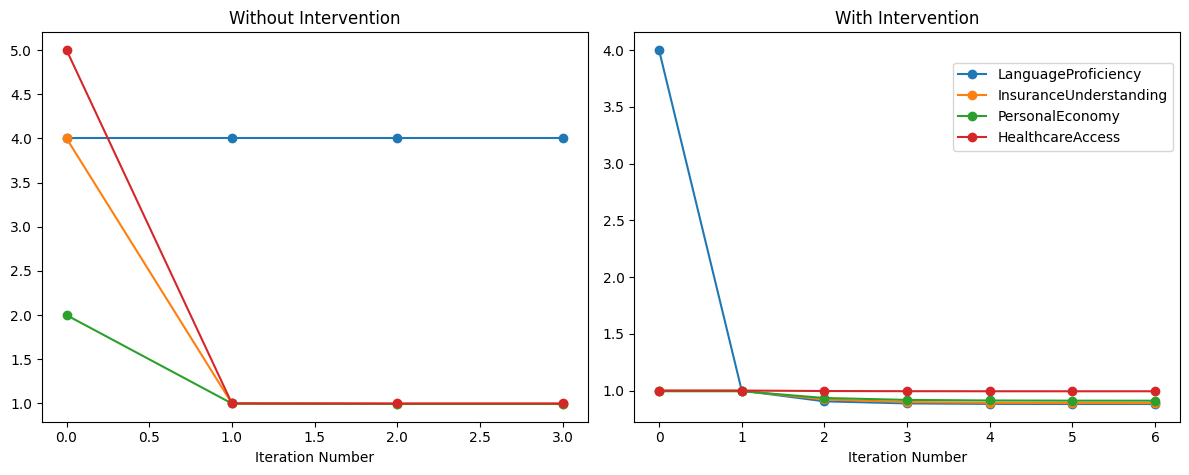

In [8]:
# Plotting intervention results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

baseline.plot(ax=axes[0], marker='o')
axes[0].get_legend().remove()
axes[0].set_xlabel("Iteration Number")
axes[0].set_title("Without Intervention")

intervention_results.plot(ax=axes[1], marker='o')
axes[1].legend(bbox_to_anchor=(1, 0.94))
axes[1].set_xlabel("Iteration Number")
axes[1].set_title("With Intervention")

plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()